# Jupyter Notebook with SkLearn and Linear Regression 
## This notebook represents the "basics" with Data Science work

# Includes and Libraries

In [1]:
############################################
# INCLUDES
############################################
#libraries specific to this example
import numpy as np
import pandas as pd
import scipy as sp
from sklearn.linear_model import LinearRegression
import matplotlib as matplt
import matplotlib.pyplot as plt

#a set of libraries that perhaps should always be in Python source
import os 
import datetime
import sys
import gc
import getopt
import inspect
import math
import warnings

#a darn useful library for creating paths and one I recommend you load to your environment
from pathlib import Path


#Import a custom library, in this case a fairly useful logging framework
debug_lib_location = Path("./")
sys.path.append(str(debug_lib_location))
import debug

root_location="."+os.sep+"data";

In [2]:
############################################
#JUPYTER NOTEBOOK OUTPUT CONTROL / FORMATTING
############################################
#pandas set floating point to 4 places to things don't run loose
pd.options.display.float_format = '{:,.4f}'.format
np.set_printoptions(precision=4)

# Variable declaration

In [3]:
############################################
# GLOBAL VARIABLES
############################################
DEBUG = 1
DEBUG_DATA = 0

# CODE CONSTRAINTS
VERSION_NAME    = "SKLearn"
VERSION_MAJOR   = 0
VERSION_MINOR   = 0
VERSION_RELEASE = 1

#used for values outside standard ASCII, just do it, you'll need it
ENCODING  ="utf-8"

############################################
# GLOBAL CONSTANTS
############################################
TEMPERATURE="Temp(C)"
SALINITY="Sal(PSU)"

############################################
# APPLICATION VARIABLES
############################################

############################################
# GLOBAL CONFIGURATION
############################################
os.environ['PYTHONIOENCODING']=ENCODING


# Example of Defining a Function

In [4]:
def lib_diagnostics():
    debug.msg_debug("System version    #:{:>12}".format(sys.version))
    debug.msg_debug("Matplotlib version#:{:>12}".format(matplt.__version__))
    debug.msg_debug("Numpy version     #:{:>12}".format(np.__version__))
    debug.msg_debug("Pandas version    #:{:>12}".format(pd.__version__))
    debug.msg_debug("SciPy version     #:{:>12}".format(sp.__version__))

    return

# Library Invocation
### Note that it's also useful to use this code so that you carry around a list of version dependencies and know how you did something (version)

In [5]:
lib_diagnostics()

[2022-09-28 14:15:53 Central Daylight Time]   DEBUG: System version    #:3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 05:37:49) [MSC v.1916 64 bit (AMD64)] 
[2022-09-28 14:15:53 Central Daylight Time]   DEBUG: Matplotlib version#:       3.2.2 
[2022-09-28 14:15:53 Central Daylight Time]   DEBUG: Numpy version     #:      1.19.5 
[2022-09-28 14:15:53 Central Daylight Time]   DEBUG: Pandas version    #:       1.2.3 
[2022-09-28 14:15:53 Central Daylight Time]   DEBUG: SciPy version     #:       1.7.3 


# Data Read
### Using pandas read in a data file and establish a log for output.

In [6]:
#READ DATA IN
filename=os.sep + "mooring_data.txt"
data=pd.read_csv(root_location+filename, delimiter='^', engine='python')

log_file = "."+os.sep+"data"+os.sep+"feature_1_batch_1.log"

In [7]:
data

,Time(ms),Depth(m),Pres(dbar),Temp(C),Cond(S/m),Sal(PSU),a650__,a676__,a715__,c510__,...,BetaP(532),bbP(532),bb(532),Beta(650),BetaP(650),bbP(650),bb(650),CHL(ug/l),PE(ppb),CDOM(ppb)
0,2040,2.4120,2.4290,20.2413,3.0704,21.2229,0.4937,0.6243,1.1033,3.5300,...,0.0063,0.0434,0.0446,0.0056,0.0056,0.0384,0.0389,0.0260,6.5550,14.2500
1,2040,2.4120,2.4290,20.2413,3.0704,21.2229,0.4980,0.6304,1.1030,3.5090,...,0.0063,0.0434,0.0446,0.0056,0.0056,0.0384,0.0389,0.0260,6.5550,14.2500
2,2040,2.4120,2.4290,20.2413,3.0704,21.2229,0.4928,0.6280,1.1028,3.5117,...,0.0063,0.0434,0.0446,0.0056,0.0056,0.0384,0.0389,0.0260,6.5550,14.2500
3,2040,2.4120,2.4290,20.2413,3.0704,21.2229,0.4971,0.6335,1.1029,3.4770,...,0.0063,0.0434,0.0446,0.0056,0.0056,0.0384,0.0389,0.0260,6.5550,14.2500
4,2040,2.4120,2.4290,20.2413,3.0704,21.2229,0.4967,0.6282,1.1030,3.4634,...,0.0063,0.0434,0.0446,0.0056,0.0056,0.0384,0.0389,0.0260,6.5550,14.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54220,284457140,0.2290,0.2310,14.3813,0.0098,0.0601,0.9913,0.9685,0.8631,2.3599,...,0.0331,0.2288,0.2300,0.0134,0.0133,0.0919,0.0924,0.2600,1.0051,12.5000
54221,284457140,0.2290,0.2310,14.3813,0.0098,0.0601,0.9876,0.9696,0.8609,2.3624,...,0.0331,0.2288,0.2300,0.0134,0.0133,0.0919,0.0924,0.2600,1.0051,12.5000
54222,284457140,0.2290,0.2310,14.3813,0.0098,0.0601,0.9801,0.9617,0.8573,2.3703,...,0.0331,0.2288,0.2300,0.0134,0.0133,0.0919,0.0924,0.2600,1.0051,12.5000
54223,284457140,0.2290,0.2310,14.3813,0.0098,0.0601,0.9703,0.9556,0.8595,2.3600,...,0.0331,0.2288,0.2300,0.0134,0.0133,0.0919,0.0924,0.2600,1.0051,12.5000


In [8]:
#what does the data domain look like?
print(data.columns)

Index([' Time(ms)', 'Depth(m)', 'Pres(dbar)', 'Temp(C)', 'Cond(S/m)',
       'Sal(PSU)', 'a650__', 'a676__', 'a715__', 'c510__', 'c532__', 'c555__',
       'a412__', 'a440__', 'a488__', 'c650__', 'c676__', 'c715__', 'a510__',
       'a532__', 'a555__', 'c412__', 'c440__', 'c488__', 'Beta(470)',
       'BetaP(470)', 'bbP(470)', 'bb(470)', 'Beta(532)', 'BetaP(532)',
       'bbP(532)', 'bb(532)', 'Beta(650)', 'BetaP(650)', 'bbP(650)', 'bb(650)',
       'CHL(ug/l)', 'PE(ppb)', 'CDOM(ppb)'],
      dtype='object')


In [9]:
#learn pandas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54225 entries, 0 to 54224
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0    Time(ms)   54225 non-null  int64  
 1   Depth(m)    54225 non-null  float64
 2   Pres(dbar)  54225 non-null  float64
 3   Temp(C)     54225 non-null  float64
 4   Cond(S/m)   54225 non-null  float64
 5   Sal(PSU)    54225 non-null  float64
 6   a650__      54225 non-null  float64
 7   a676__      54225 non-null  float64
 8   a715__      54225 non-null  float64
 9   c510__      54221 non-null  float64
 10  c532__      54224 non-null  float64
 11  c555__      54225 non-null  float64
 12  a412__      54191 non-null  float64
 13  a440__      54196 non-null  float64
 14  a488__      54213 non-null  float64
 15  c650__      54225 non-null  float64
 16  c676__      54225 non-null  float64
 17  c715__      54225 non-null  float64
 18  a510__      54221 non-null  float64
 19  a532__      54224 non-nul

In [10]:
#learn MORE pandas
data.describe()

,Time(ms),Depth(m),Pres(dbar),Temp(C),Cond(S/m),Sal(PSU),a650__,a676__,a715__,c510__,...,BetaP(532),bbP(532),bb(532),Beta(650),BetaP(650),bbP(650),bb(650),CHL(ug/l),PE(ppb),CDOM(ppb)
count,"54,225.0000","54,225.0000","54,225.0000","54,225.0000","54,225.0000","54,225.0000","54,225.0000","54,225.0000","54,225.0000","54,221.0000",...,"54,225.0000","54,225.0000","54,225.0000","54,225.0000","54,225.0000","54,225.0000","54,225.0000","54,225.0000","54,225.0000","54,225.0000"
mean,"142,272,472.1344",2.4052,2.4217,20.4734,3.3244,23.0135,0.8114,0.9437,1.3253,9.5783,...,0.0196,0.1354,0.1366,0.0104,0.0104,0.0717,0.0722,0.0559,9.7436,15.9809
std,"82,600,499.9928",0.2680,0.2698,1.0591,0.4264,2.9027,0.3246,0.3143,0.2478,6.6257,...,0.0146,0.1012,0.1012,0.0034,0.0034,0.0234,0.0234,0.0470,2.3775,3.8851
min,"2,040.0000",0.2290,0.2310,11.7240,0.0078,0.0504,0.4563,0.5952,0.8372,1.4566,...,-0.0002,-0.0011,0.0001,-0.0000,-0.0001,-0.0007,-0.0003,-0.2990,0.1311,1.2500
25%,"70,246,260.0000",2.3610,2.3770,20.2524,3.1963,22.3201,0.5177,0.6567,1.1140,3.7241,...,0.0070,0.0481,0.0492,0.0067,0.0067,0.0461,0.0466,0.0260,8.0845,13.0000
50%,"142,231,130.0000",2.4360,2.4530,20.6635,3.3494,23.1836,0.7607,0.9061,1.2581,7.6110,...,0.0159,0.1097,0.1108,0.0134,0.0133,0.0919,0.0924,0.0520,9.5703,15.2500
75%,"214,214,980.0000",2.5050,2.5220,21.0876,3.5465,24.3282,0.9888,1.1141,1.4475,13.3235,...,0.0255,0.1762,0.1773,0.0134,0.0133,0.0919,0.0924,0.0910,11.7553,18.5000
max,"284,457,140.0000",2.8280,2.8470,21.3571,4.0005,28.3290,2.8148,2.7860,2.7880,38.2055,...,0.0575,0.3977,0.3988,0.0134,0.0133,0.0919,0.0924,0.3900,15.4261,29.0000


# Prep the data

In [11]:
#PURGE DATA
debug.msg_info("Data scrub and prep")
#load teperature (referenced by name) for all values (y, x); (all rows, column=Temp)
#into a single dimensional array that is Numpy based (means you got lots of free powerful tools)
xs=data.loc[:,TEMPERATURE].values
debug.msg_debug("XS array from " + str(TEMPERATURE) + " is " + str(xs.size))

ys=data.loc[:,SALINITY].values
debug.msg_debug("YS array from " + SALINITY + " is " + str(ys.size))

#machine learning doesn't like negative numbers, there are multiple ways of doing this
#pd.DataFrame().query() or np.where() are some options
#LEARN PANDAS!!!!
debug.msg_debug("")
debug.msg_debug("Performing Y mask cleaning")
y_mask=np.where(ys < 1)
debug.msg_debug("")

#clear out the values that should be scrubbed.  Again, any technique to clean the data is viable.
all_xs = np.delete(xs, y_mask)
debug.msg_debug("all_xs (> 1) array from " + TEMPERATURE + " is " + str(all_xs.size))
all_ys = np.delete(ys, y_mask)
debug.msg_debug("all_ys (> 1) array from " + SALINITY + " is " + str(all_ys.size))

[2022-09-28 14:16:01 Central Daylight Time]    INFO: Data scrub and prep 
[2022-09-28 14:16:01 Central Daylight Time]   DEBUG: XS array from Temp(C) is 54225 
[2022-09-28 14:16:01 Central Daylight Time]   DEBUG: YS array from Sal(PSU) is 54225 
[2022-09-28 14:16:01 Central Daylight Time]   DEBUG:  
[2022-09-28 14:16:01 Central Daylight Time]   DEBUG: Performing Y mask cleaning 
[2022-09-28 14:16:01 Central Daylight Time]   DEBUG:  
[2022-09-28 14:16:01 Central Daylight Time]   DEBUG: all_xs (> 1) array from Temp(C) is 53550 
[2022-09-28 14:16:01 Central Daylight Time]   DEBUG: all_ys (> 1) array from Sal(PSU) is 53550 


In [12]:
#example of all_xs output (temperature)
all_xs

array([20.2413, 20.2413, 20.2413, ..., 18.7201, 18.7201, 18.7201])

In [13]:
#transpose the data, the API expects it
all_xs = np.transpose([all_xs])
debug.msg_debug("all_xs (transposed) array from " +  TEMPERATURE + " is " + str(all_xs.size))

all_ys = np.transpose([all_ys])
debug.msg_debug("all_ys (transposed) array from " +  SALINITY + " is " + str(all_ys.size))


[2022-09-28 14:16:02 Central Daylight Time]   DEBUG: all_xs (transposed) array from Temp(C) is 53550 
[2022-09-28 14:16:02 Central Daylight Time]   DEBUG: all_ys (transposed) array from Sal(PSU) is 53550 


In [14]:
#example of all_xs output now (tafter transpose)
all_xs

array([[20.2413],
       [20.2413],
       [20.2413],
       ...,
       [18.7201],
       [18.7201],
       [18.7201]])

# Statistics
### Lots of statistics at your fingertips with Numpy
### Also useful as it helps with quick operations for other functions (plotting, data smoothing, etc.)

In [15]:
#STATISTICS
x_mean=data[TEMPERATURE].apply(np.mean)
x_std=data[TEMPERATURE].apply(np.std)
x_mean_max=np.max(x_mean)
x_std_max=np.max(x_std)
x_range_limit=x_mean_max + (x_std_max * 5)

y_mean=data[SALINITY].apply(np.mean)
y_std=data[SALINITY].apply(np.std)
y_mean_max=np.max(y_mean)
y_std_max=np.max(y_std)
y_range_limit=y_mean_max + (y_std_max * 5)

# Plots

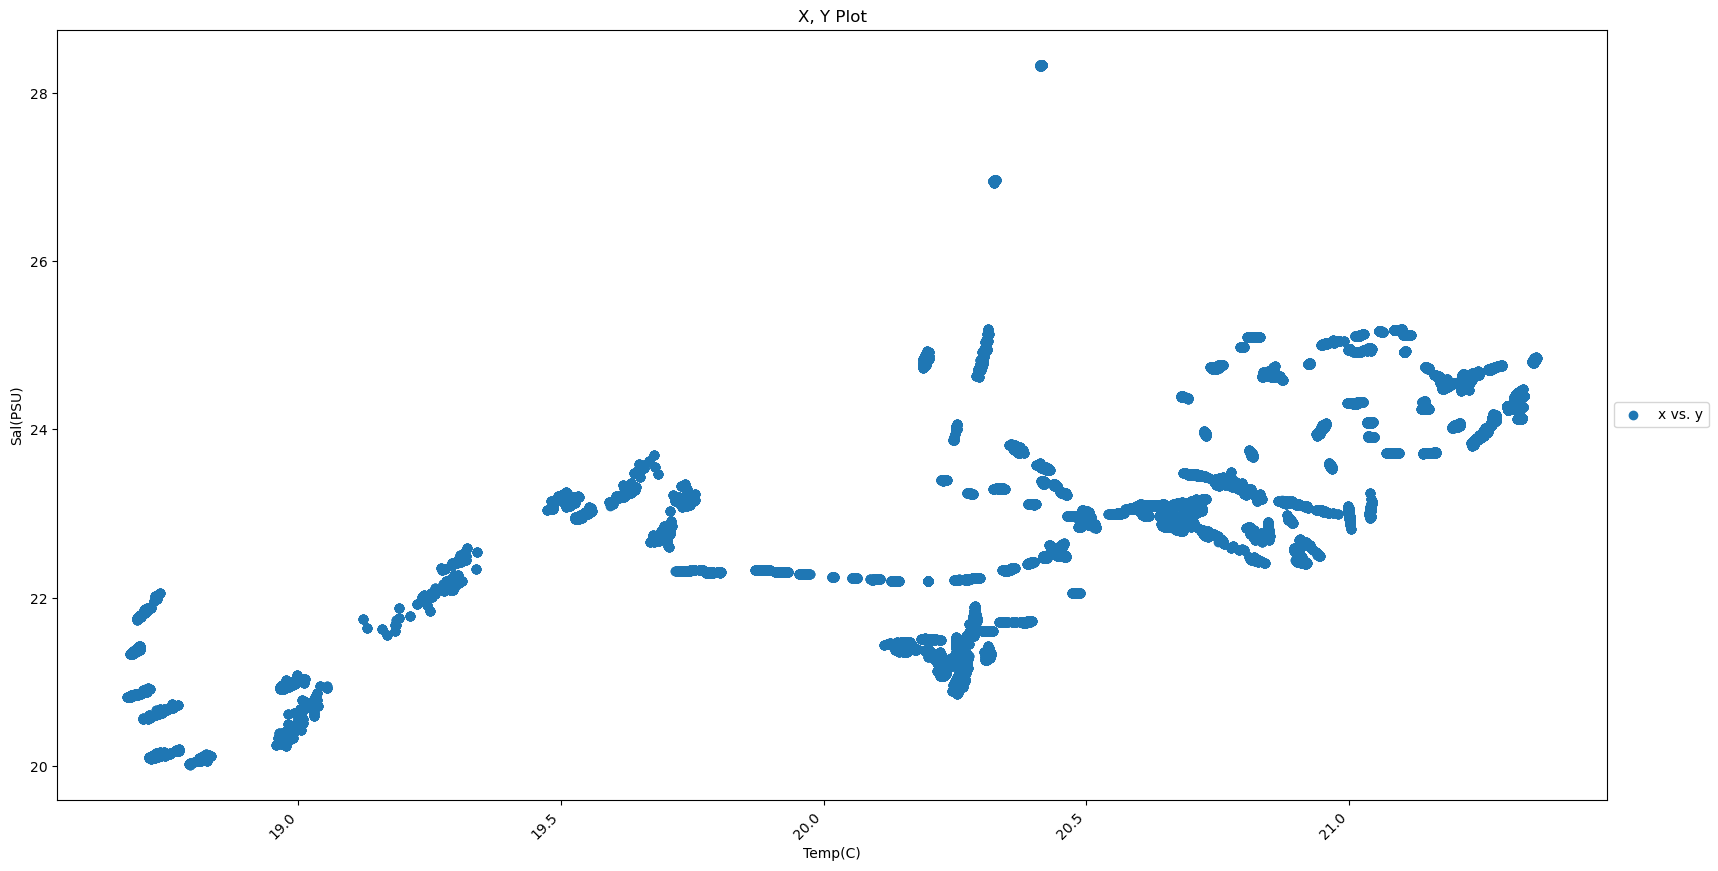

In [16]:
#show the image inline
%matplotlib inline
PLT_X_SIZE=20
PLT_Y_SIZE=10
PLT_LGD_X_OFFSET=1
PLT_LGD_Y_OFFSET=0.5

#establish the initial figure dimensions and configuration (purposely made large 20x10 inches)
fig = plt.figure(1,figsize=(PLT_X_SIZE, PLT_Y_SIZE))

#this is where you could have multiple plots side by side
axes = plt.subplot(111)
axes.set_title('X, Y Plot')
axes.set_ylabel(SALINITY)
axes.set_xlabel(TEMPERATURE)

labels=axes.get_xticklabels()
plt.setp(labels,rotation=45,horizontalalignment='right')

axes.scatter(all_xs, all_ys, label='x vs. y')
axes.legend(loc='center left', bbox_to_anchor=(PLT_LGD_X_OFFSET,PLT_LGD_Y_OFFSET))


# Linear Regression (SKlearn)

In [17]:
#instantiate the model
lm = LinearRegression()

#fit values with the clean data
lm.fit(all_xs, all_ys)

#run a prediction given the calculation (yeah...that easy)
new_y=lm.predict(all_xs)

In [18]:
debug.msg_debug("             Intercept:" + str(lm.intercept_))
debug.msg_debug("Number of Coefficients:" + str(len(lm.coef_)))

[2022-09-28 14:16:09 Central Daylight Time]   DEBUG:              Intercept:[-6.4635] 
[2022-09-28 14:16:09 Central Daylight Time]   DEBUG: Number of Coefficients:1 


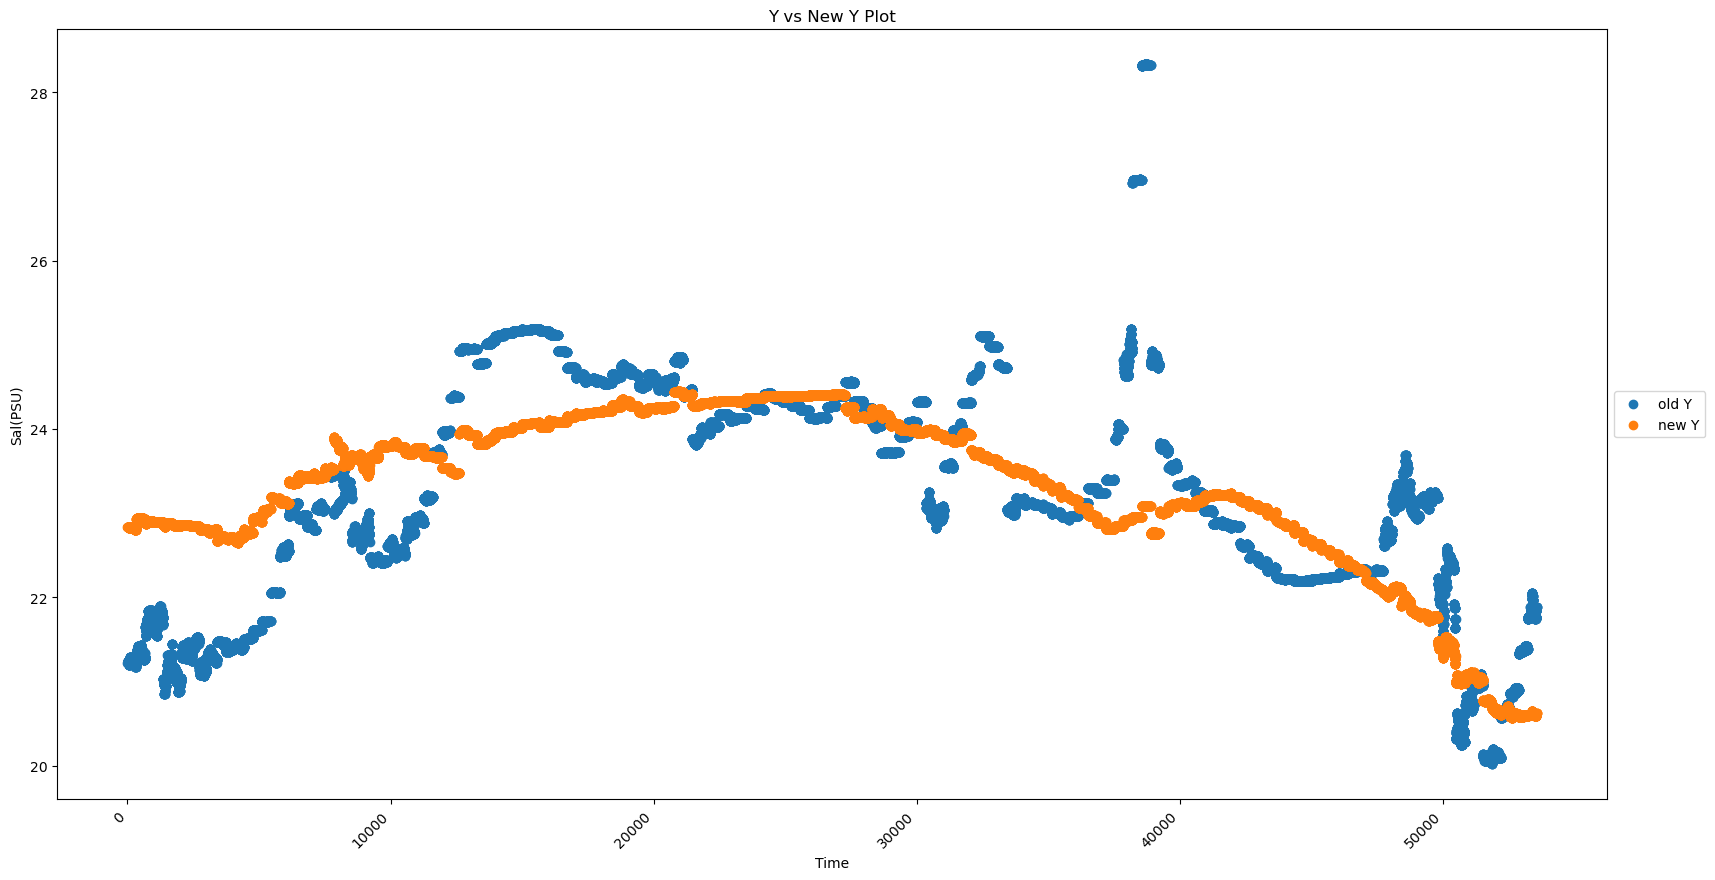

In [19]:
#PLOT DATA (QUICK LOOK)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
PLT_X_SIZE=20
PLT_Y_SIZE=10
PLT_LGD_X_OFFSET=1
PLT_LGD_Y_OFFSET=0.5

fig = plt.figure(1,figsize=(PLT_X_SIZE, PLT_Y_SIZE))

axes = plt.subplot(111)
axes.set_title('Y vs New Y Plot')
axes.set_ylabel(SALINITY)
axes.set_xlabel('Time')

labels=axes.get_xticklabels()
plt.setp(labels,rotation=45,horizontalalignment='right')

axes.scatter(range(0,all_ys.size),all_ys, label='old Y')
axes.scatter(range(0,new_y.size),new_y, label='new Y')
axes.legend(loc='center left', bbox_to_anchor=(PLT_LGD_X_OFFSET,PLT_LGD_Y_OFFSET))


In [20]:
#newY is the prediction across the oldY values.